# IT420 - Computer Vision
## Assignment 2 - Hough Transform

#### Submitted by : Prince Piyush (2K16/CO/236, Slot - Q) 


### Q1:- Implement Canny edge detector.
### Solution 1

**Canny Edge**:- It is a multi-step algorithm that can detect edges with noise suppressed at the same time. It takes input from the output of the Sobel operator and improves it. The process includes the smoothening of the image using Gaussian Blur. Then, applying the Sobel operator to find edges gradients. And then use thresholds to preserve and discard edges. 

#### Code: 

In [3]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

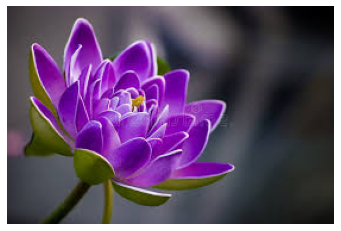

In [6]:
# Load Image 

img = cv2.imread('flower.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [7]:
# Finding edges with Canny Edge Detector

edges = cv2.Canny(gray, 100, 200)

In [8]:
# Super Imposing detected edges (green colour) on original Image

img[edges == 255] = [0, 255, 0]

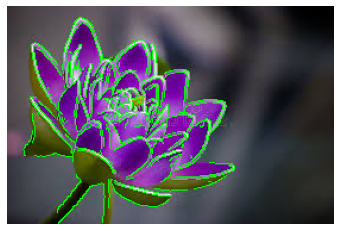

In [9]:
# Showing the Output image with Edges

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:** Here we used the canny edge detector to find the edges in the image and plotted them on the original image in green colour. Here, in `cv2.Canny(image, threshold_1, threshold_2)` function we used 3 parameters **(i)** the original image variable, **(ii)** Lower Threshold, and **(iii)** Upper Threshold. The significance of thresholds is that the edges having a weight greater than the upper threshold are definitely included and the edges having weight less than the lower threshold are discarded. but the edges with a weight between the two thresholds are included depending on if they are connected to any edge with a weight greater than the upper Threshold. 

### Q2:- Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.
### Solution 2

**Hough Transform**:- It is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

#### Code: 

In [10]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

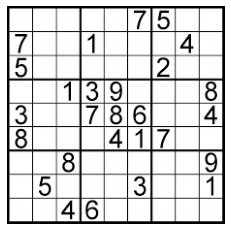

In [22]:
# Load Image 

img = cv2.imread('corners.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [23]:
# Finding edges with Canny Edge Detector

edges = cv2.Canny(gray, 100, 200)

In [24]:
# Finding lines with Hough Transform using edges detected by Canny Edge Detector

lines = cv2.HoughLines(edges,1,np.pi/180,200)

In [25]:
# Plotting lines on original image  

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

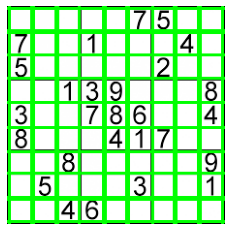

In [26]:
# Showing the Output image with Lines

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:** Here, first we used the cannyedge detector and then lines were found with Hough Transform using edegs detected by Canny Edge detector. 

Everything explained above is encapsulated in the OpenCV function, cv2.HoughLines(). It simply returns an array of (rho, theta) values. Rho is measured in pixels and theta is measured in radians. First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform. Second and third parameters are \rho and \theta accuracies respectively. Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected. 

After finding the lines, they are drawn over original image in green colour.


### Q3:- Implement Hough transform to detect circles in the image. Superimpose detected circles on the original image.
### Solution 3

**Hough Transform**:- It is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.

#### Code: 

In [12]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

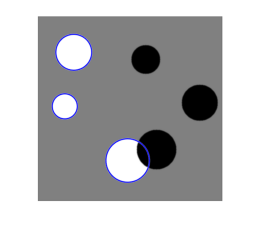

In [38]:
# Load Image 

img = cv2.imread('balls.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [39]:
# Finding Circles with Hough Transform

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,100,
                            param1=100,param2=30)

In [40]:
# Drawing Circles on original image  

out = img.copy()

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(out,(i[0],i[1]),i[2],(0,255,0),2) # circle
    cv2.circle(out,(i[0],i[1]),2,(0,0,255),3) #center

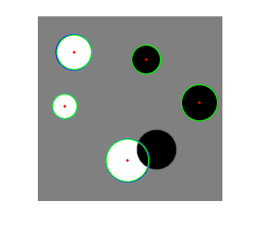

In [41]:
# Showing the Output image with Circles

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:**  cv2.HoughCircles has been used to find the circles in image along with Parameters:	
1. image – 8-bit, single-channel, grayscale input image.

2. method – Detection method to use. Currently, the only implemented method is CV_HOUGH_GRADIENT , which is basically 21HT.

3. dp – Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.

4. minDist – Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.

5. param1 – First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector (the lower one is twice smaller).

6. param2 – Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.

After finding the circles, circles are drawn over original image in green colour.

### Q4:- Implement Harris and Stephen operator for corner. Mark detected corners on original image.
### Solution 4

**Harris and Stephen operator**:- The Harris Corner Detector is a mathematical operator that finds features in an image. It is simple to compute, and is fast enough to work on computers. Also, it is popular because it is rotation, scale and illumination variation independent.

#### Code: 

In [17]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

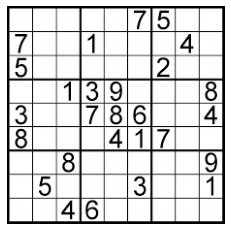

In [42]:
# Load Image 

img = cv2.imread('corners.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [43]:
#Finding Corners using Harris and Stephen Operator

dst = cv2.cornerHarris(gray,2,3,0.04)

# Dilating the Corners to make them visible
dst = cv2.dilate(dst,None)

In [44]:
# Marking corners on original image by thresholding unnecessary small corners

out = img.copy()
out[dst>0.01*dst.max()]=[0,255,0]

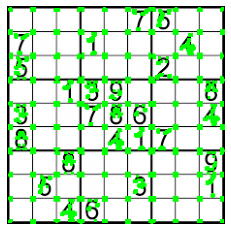

In [45]:
# Showing the Output image with Circles

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:** cv2.cornerHarris has been used with parameters:	
1. src – Input single-channel 8-bit or floating-point image.
2. dst – Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
3. blockSize – Neighborhood size.
4. ksize – Aperture parameter for the Sobel() operator.
5. k – Harris detector free parameter. 

After finding the corners with Harris Corner detector, unnecessary small corners have been removed and remaining ones are drawn over original image in green colour.


### Q5:- Implement full FAST corner detector. Mark detected corners on the original image.
### Solution 5

**FAST corner detector**:- **Features from Accelerated Segment Test (FAST)** It is a corner detection method, which could be used to extract feature points and later used to track and map objects in many computer vision tasks. The FAST corner detector was originally developed by Edward Rosten and Tom Drummond and was published in 2006. The most promising advantage of the FAST corner detector is its computational efficiency. Moreover, when machine learning techniques are applied, superior performance in terms of computation time and resources can be realized. The FAST corner detector is very suitable for real-time video processing application because of this high-speed performance.

#### Code: 

In [22]:
# Required Libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

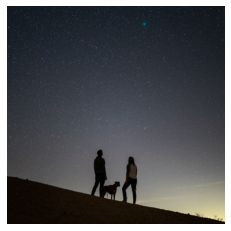

In [46]:
# Load Image 

img = cv2.imread('pic.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [47]:
# Finding Features using FAST Feature Detector

# Initiate FAST Detector object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(gray,None)

In [48]:
# Marking features on original image

out = img.copy()
out = cv2.drawKeypoints(img, kp, out, color=(0,255,0))

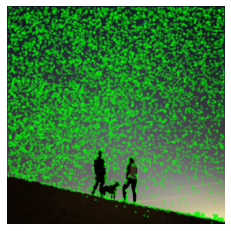

In [49]:
# Showing the Output image with Circles

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Conclusion:**  
First of all, a fast detector obejct with default values has been initiated and then the keypoints are generated after comparing the intensity of neighborhood pixels(almost 16). 

After keypoints are generated, they are drawn over original image in green colour.